In [8]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [10]:
y.shape

(70000,)

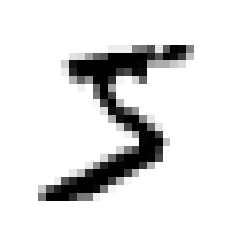

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis('off')

plt.show()

In [12]:
y[0]

'5'

In [13]:
y = y.astype(np.uint8)

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([some_digit])

array([ True])

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [19]:
y_5 = (y == 5)

In [20]:
cross_val_score(sgd_clf, X, y_5, cv=3, scoring='accuracy')

array([0.96794377, 0.94797069, 0.96194231])

In [21]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto', random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [22]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [23]:
np.argmax(some_digit_scores)

5

In [24]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
svm_clf.classes_[5]

5

In [26]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [27]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

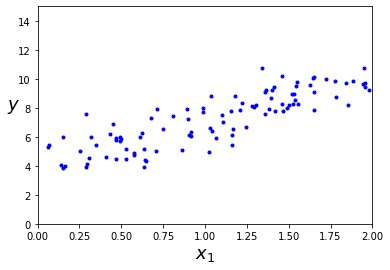

In [29]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [30]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[4.04579057],
       [3.02423409]])

In [31]:
np.linalg.pinv(X_b).dot(y)

array([[4.04579057],
       [3.02423409]])

In [32]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.04579057],
       [10.09425875]])

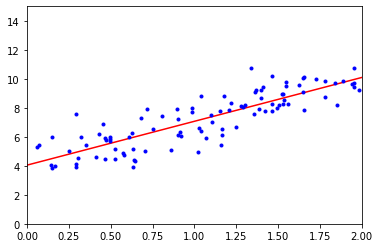

In [33]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.04579057]), array([[3.02423409]]))

In [35]:
lin_reg.predict(X_new)

array([[ 4.04579057],
       [10.09425875]])

<function matplotlib.pyplot.show(*args, **kw)>

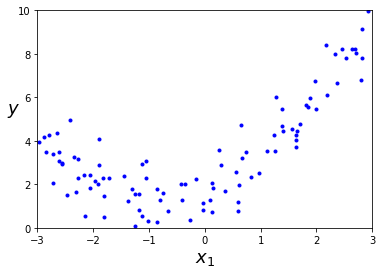

In [36]:
import numpy.random as rnd
np.random.seed(42)

m = 100
X = 6 * rnd.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + rnd.randn(m, 1)

plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [38]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

<function matplotlib.pyplot.show(*args, **kw)>

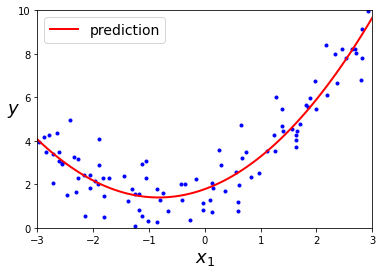

In [40]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='prediction')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show

In [45]:
from google.colab import drive
import os, sys
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
cd week11

/content/drive/MyDrive/Colab Notebooks/week11


In [64]:
!git init
!git remote add origin https://github.com/kwonjh0825/HCI_week11.git
!git config --global user.email 'ghr1700@naver.com'
!git config --global user.name "kwonjh0825"
!git branch -M main
!git add .
!git commit -m 'week11-practice'
!git push origin main

Reinitialized existing Git repository in /content/drive/MyDrive/Colab Notebooks/week11/.git/
fatal: remote origin already exists.
[main 96bf95e] week11-practice
 1 file changed, 1 insertion(+), 1 deletion(-)
fatal: could not read Username for 'https://github.com': No such device or address


In [61]:
!git branch

* master
